<a href="https://colab.research.google.com/github/ehtesham925/StudentManagent/blob/TestBranch/site/en/tutorials/images/cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##### Copyright 2019 The TensorFlow Authors.

In [1]:
import numpy as np
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# ------------------------------
# Load dataset
# ------------------------------
# digits = load_digits()
# X = digits.images   # shape (1797, 8, 8)
# y = digits.target   # integers 0-9

# # Normalize pixel values (0–16 → 0–1)
# X = X / 16.0

# # Reshape for CNN (add channel dimension)
# X = X.reshape(-1, 8, 8, 1)   # (n_samples, height, width, channels)

# # Train-test split
# X_train, X_test, y_train, y_test = train_test_split(
#     X, y, test_size=0.2, random_state=42, stratify=y
# )
from tensorflow.keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Normalize
X_train = X_train.astype("float32") / 255.0
X_test = X_test.astype("float32") / 255.0

# Reshape (add channel)
X_train = np.expand_dims(X_train, -1)  # (n,28,28,1)
X_test = np.expand_dims(X_test, -1)

# Build CNN with input_shape=(28,28,1)
# (same structure as yours but bigger input)

# Train & evaluate like before






# ------------------------------
# CNN Model
# ------------------------------
cnn = Sequential()

# Conv + Pool layers
cnn.add(Conv2D(32, (3,3), activation='relu', input_shape=(8,8,1), padding="same"))
cnn.add(MaxPooling2D(pool_size=(2,2)))

cnn.add(Conv2D(64, (3,3), activation='relu', padding="same"))
cnn.add(MaxPooling2D(pool_size=(2,2)))

cnn.add(Flatten())

# Fully connected layers
cnn.add(Dense(64, activation='relu'))
cnn.add(Dropout(0.3))

# Output layer
cnn.add(Dense(10, activation='softmax'))

# Compile
cnn.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# ------------------------------
# Early stopping
# ------------------------------
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    patience=5,
    restore_best_weights=True
)

# ------------------------------
# Train
# ------------------------------
history = cnn.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=50,
    batch_size=32,
    callbacks=[early_stopping],
    verbose=1
)

# ------------------------------
# Evaluate
# ------------------------------
test_loss, test_acc = cnn.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {test_acc:.4f}")


# Save entire model (architecture + weights + optimizer state)
cnn.save("cnn_digits_model.h5")
print("Model saved as cnn_digits_model.h5")

from tensorflow.keras.models import load_model

# Load the saved model
loaded_model = load_model("cnn_digits_model.h5")
print("Model loaded successfully!")

# Evaluate loaded model
loss, acc = loaded_model.evaluate(X_test, y_test, verbose=0)
print(f"Loaded model accuracy: {acc:.4f}")


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50


ValueError: Exception encountered when calling Sequential.call().

[1mInput 0 of layer "dense" is incompatible with the layer: expected axis -1 of input shape to have value 256, but received input with shape (32, 3136)[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=(32, 28, 28, 1), dtype=float32)
  • training=True
  • mask=None
  • kwargs=<class 'inspect._empty'>

In [ ]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

Training data shape: (60000, 28, 28, 1)
Test data shape: (10000, 28, 28, 1)
Epoch 1/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.8602 - loss: 0.4526 - val_accuracy: 0.9816 - val_loss: 0.0607
Epoch 2/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9778 - loss: 0.0732 - val_accuracy: 0.9846 - val_loss: 0.0495
Epoch 3/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9850 - loss: 0.0468 - val_accuracy: 0.9893 - val_loss: 0.0394
Epoch 4/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9893 - loss: 0.0342 - val_accuracy: 0.9896 - val_loss: 0.0339
Epoch 5/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9920 - loss: 0.0254 - val_accuracy: 0.9887 - val_loss: 0.0380
Epoch 6/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9930 - loss: 0.0223 - val_accuracy: 0.9883 - val_loss: 0.0391
Epoch 7/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9926 - loss: 0.0223 - val_accuracy: 0.9902 - val_loss: 0.0360
Epoch 8/20
750/750 ━━━━━━━━

Test Accuracy: 0.9923
Model saved as mnist_cnn_model.h5


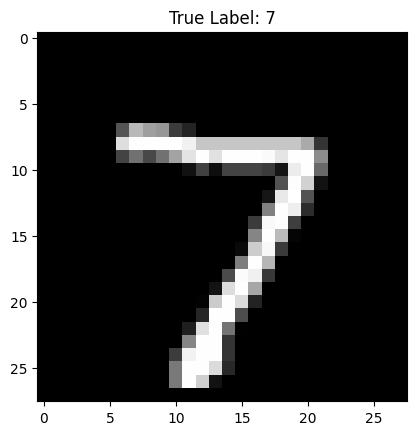

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 447ms/step
Predicted Label: 7


In [2]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.datasets import mnist

# ------------------------------
# Load MNIST dataset
# ------------------------------
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Normalize (0–255 → 0–1)
X_train = X_train.astype("float32") / 255.0
X_test = X_test.astype("float32") / 255.0

# Reshape to add channel dimension (grayscale → 1 channel)
X_train = np.expand_dims(X_train, -1)   # (60000, 28, 28, 1)
X_test = np.expand_dims(X_test, -1)     # (10000, 28, 28, 1)

print("Training data shape:", X_train.shape)
print("Test data shape:", X_test.shape)

# ------------------------------
# CNN Model
# ------------------------------
cnn = Sequential()

# Conv + Pool layers
cnn.add(Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1), padding="same"))
cnn.add(MaxPooling2D(pool_size=(2,2)))

cnn.add(Conv2D(64, (3,3), activation='relu', padding="same"))
cnn.add(MaxPooling2D(pool_size=(2,2)))

cnn.add(Flatten())

# Fully connected layers
cnn.add(Dense(128, activation='relu'))
cnn.add(Dropout(0.3))

# Output layer (10 digits: 0–9)
cnn.add(Dense(10, activation='softmax'))

# Compile
cnn.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# ------------------------------
# Early stopping
# ------------------------------
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    patience=5,
    restore_best_weights=True
)

# ------------------------------
# Train
# ------------------------------
history = cnn.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=20,
    batch_size=64,
    callbacks=[early_stopping],
    verbose=1
)

# ------------------------------
# Evaluate
# ------------------------------
test_loss, test_acc = cnn.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {test_acc:.4f}")

# ------------------------------
# Save model
# ------------------------------
cnn.save("mnist_cnn_model.h5")
print("Model saved as mnist_cnn_model.h5")

# ------------------------------
# Example Prediction
# ------------------------------
import matplotlib.pyplot as plt

idx = 0
sample_img = X_test[idx]          # shape (28,28,1)
plt.imshow(sample_img.squeeze(), cmap="gray")
plt.title(f"True Label: {y_test[idx]}")
plt.show()

# Add batch dimension
sample_img = np.expand_dims(sample_img, axis=0)  # (1,28,28,1)

y_pred = cnn.predict(sample_img)
print("Predicted Label:", np.argmax(y_pred))


# Convolutional Neural Network (CNN)

In [3]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.datasets import mnist

# ------------------------------
# Load and preprocess MNIST
# ------------------------------
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Normalize (0–255 → 0–1)
X_train = X_train.astype("float32") / 255.0
X_test = X_test.astype("float32") / 255.0

# Add channel dimension (28,28 → 28,28,1)
X_train = np.expand_dims(X_train, -1)
X_test = np.expand_dims(X_test, -1)

print("Training data shape:", X_train.shape)
print("Test data shape:", X_test.shape)

# ------------------------------
# Build CNN
# ------------------------------
cnn = Sequential()

cnn.add(Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1), padding="same"))
cnn.add(MaxPooling2D(pool_size=(2,2)))

cnn.add(Conv2D(64, (3,3), activation='relu', padding="same"))
cnn.add(MaxPooling2D(pool_size=(2,2)))

cnn.add(Flatten())
cnn.add(Dense(128, activation='relu'))
cnn.add(Dropout(0.3))

cnn.add(Dense(10, activation='softmax'))

cnn.compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

# ------------------------------
# Train with EarlyStopping
# ------------------------------
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss", patience=5, restore_best_weights=True
)

history = cnn.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=20,
    batch_size=64,
    callbacks=[early_stopping],
    verbose=1
)

# ------------------------------
# Evaluate
# ------------------------------
test_loss, test_acc = cnn.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {test_acc:.4f}")

# ------------------------------
# Save model
# ------------------------------
cnn.save("mnist_cnn_model.h5")
print("Model saved as mnist_cnn_model.h5")

# ------------------------------
# Load model and re-evaluate
# ------------------------------
loaded_model = load_model("mnist_cnn_model.h5")
loss, acc = loaded_model.evaluate(X_test, y_test, verbose=0)
print(f"Loaded model accuracy: {acc:.4f}")


Training data shape: (60000, 28, 28, 1)
Test data shape: (10000, 28, 28, 1)
Epoch 1/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.8579 - loss: 0.4469 - val_accuracy: 0.9799 - val_loss: 0.0615
Epoch 2/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9793 - loss: 0.0680 - val_accuracy: 0.9858 - val_loss: 0.0464
Epoch 3/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9862 - loss: 0.0475 - val_accuracy: 0.9881 - val_loss: 0.0407
Epoch 4/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9883 - loss: 0.0371 - val_accuracy: 0.9891 - val_loss: 0.0338
Epoch 5/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9916 - loss: 0.0264 - val_accuracy: 0.9897 - val_loss: 0.0383
Epoch 6/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9921 - loss: 0.0233 - val_accuracy: 0.9890 - val_loss: 0.0376
Epoch 7/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9935 - loss: 0.0197 - val_accuracy: 0.9867 - val_loss: 0.0479
Epoch 8/20
750/750 ━━━━━━━━━

Test Accuracy: 0.9913
Model saved as mnist_cnn_model.h5
Loaded model accuracy: 0.9913


<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://www.tensorflow.org/tutorials/images/cnn">
    <img src="https://www.tensorflow.org/images/tf_logo_32px.png" />
    View on TensorFlow.org</a>
  </td>
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/tutorials/images/cnn.ipynb">
    <img src="https://www.tensorflow.org/images/colab_logo_32px.png" />
    Run in Google Colab</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/tensorflow/docs/blob/master/site/en/tutorials/images/cnn.ipynb">
    <img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />
    View source on GitHub</a>
  </td>
  <td>
    <a href="https://storage.googleapis.com/tensorflow_docs/docs/site/en/tutorials/images/cnn.ipynb"><img src="https://www.tensorflow.org/images/download_logo_32px.png" />Download notebook</a>
  </td>
</table>

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
Predicted label: 1


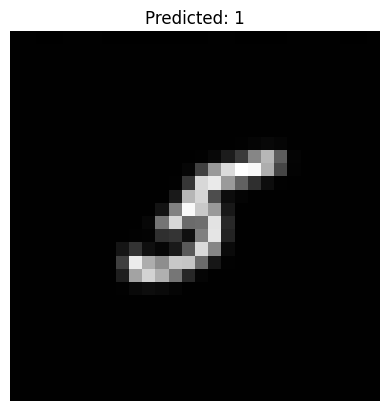

In [9]:
import matplotlib.pyplot as plt
import numpy as np
from skimage.transform import resize
import requests
from PIL import Image
from io import BytesIO

url = "https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTeOqjUXvXE0bIyCvdp5gyrAOnVPVsD9d_9gg&s"

# Load image via PIL
response = requests.get(url, headers={"User-Agent": "Mozilla/5.0"})
img = Image.open(BytesIO(response.content)).convert("L")  # grayscale

# Convert to numpy array
img = np.array(img)

# Resize to 28x28 (MNIST input size)
img_resized = resize(img, (28, 28), anti_aliasing=True)

# Normalize like training data (0–255 → 0–1)
img_resized = img_resized.astype("float32") / 255.0

# Expand dims → (1, 28, 28, 1) for CNN
img_resized = np.expand_dims(img_resized, axis=-1)  # add channel
img_resized = np.expand_dims(img_resized, axis=0)   # add batch

# Predict
y_pred = loaded_model.predict(img_resized)
predicted_label = np.argmax(y_pred, axis=1)
print("Predicted label:", predicted_label[0])

# Show image
plt.imshow(img_resized[0,:,:,0], cmap="gray")
plt.title(f"Predicted: {predicted_label[0]}")
plt.axis("off")
plt.show()


This tutorial demonstrates training a simple [Convolutional Neural Network](https://developers.google.com/machine-learning/glossary/#convolutional_neural_network) (CNN) to classify [CIFAR images](https://www.cs.toronto.edu/~kriz/cifar.html). Because this tutorial uses the [Keras Sequential API](https://www.tensorflow.org/guide/keras/overview), creating and training your model will take just a few lines of code.


### Import TensorFlow

In [ ]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

### Download and prepare the CIFAR10 dataset


The CIFAR10 dataset contains 60,000 color images in 10 classes, with 6,000 images in each class. The dataset is divided into 50,000 training images and 10,000 testing images. The classes are mutually exclusive and there is no overlap between them.

In [ ]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

### Verify the data

To verify that the dataset looks correct, let's plot the first 25 images from the training set and display the class name below each image:


In [ ]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    # The CIFAR labels happen to be arrays,
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

### Create the convolutional base

The 6 lines of code below define the convolutional base using a common pattern: a stack of [Conv2D](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D) and [MaxPooling2D](https://www.tensorflow.org/api_docs/python/tf/keras/layers/MaxPool2D) layers.

As input, a CNN takes tensors of shape (image_height, image_width, color_channels), ignoring the batch size. If you are new to these dimensions, color_channels refers to (R,G,B). In this example, you will configure your CNN to process inputs of shape (32, 32, 3), which is the format of CIFAR images. You can do this by passing the argument `input_shape` to your first layer.


In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

Let's display the architecture of your model so far:

In [ ]:
model.summary()

Above, you can see that the output of every Conv2D and MaxPooling2D layer is a 3D tensor of shape (height, width, channels). The width and height dimensions tend to shrink as you go deeper in the network. The number of output channels for each Conv2D layer is controlled by the first argument (e.g., 32 or 64). Typically,  as the width and height shrink, you can afford (computationally) to add more output channels in each Conv2D layer.

### Add Dense layers on top

To complete the model, you will feed the last output tensor from the convolutional base (of shape (4, 4, 64)) into one or more Dense layers to perform classification. Dense layers take vectors as input (which are 1D), while the current output is a 3D tensor. First, you will flatten (or unroll) the 3D output to 1D,  then add one or more Dense layers on top. CIFAR has 10 output classes, so you use a final Dense layer with 10 outputs.

In [ ]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

Here's the complete architecture of your model:

In [ ]:
model.summary()

The network summary shows that (4, 4, 64) outputs were flattened into vectors of shape (1024) before going through two Dense layers.

### Compile and train the model

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))

### Evaluate the model

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

In [ ]:
print(test_acc)

Your simple CNN has achieved a test accuracy of over 70%. Not bad for a few lines of code! For another CNN style, check out the [TensorFlow 2 quickstart for experts](https://www.tensorflow.org/tutorials/quickstart/advanced) example that uses the Keras subclassing API and `tf.GradientTape`.